# Deep Learning Project: Build a Traffic Sign Recognition Classifier
**This Project is part of Udacity Self-Driving Car Engineer Nanodegree**

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## 1. Load the Data

In [1]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## 2. Basic Summary & Exploration of the Data Set Using Numpy, Pandas and Matpotlib

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

**2.1 Number of Samples for training, validation and testing**

In [2]:
print(train)

{'coords': array([[  6,   5,  21,  20],
       [  6,   6,  22,  22],
       [  5,   6,  22,  23],
       ..., 
       [ 17,  15, 178, 155],
       [ 17,  15, 183, 160],
       [ 20,  18, 211, 184]], dtype=uint8), 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8), 'features': array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ..., 
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ..., 
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ..., 
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ..., 
        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ..., 
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        

In [3]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
n_train = len(train['labels'])
n_validation = len(valid['labels'])
n_test = len(test['labels'])

print('Number of Training Labels', n_train)
print('Number of Validation Labels', n_validation)
print('Number of Testing Labels', n_test)

Number of Training Labels 34799
Number of Validation Labels 4410
Number of Testing Labels 12630


**2.2 Number of unique labels (classes)**

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame.from_dict(train,orient='index').transpose() 
df.head()

,coords,labels,features,sizes
0,"[[6, 5, 21, 20], [6, 6, 22, 22], [5, 6, 22, 23...","[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 4...","[[[[28 25 24], [27 24 23], [27 24 22], [27 24 ...","[[26, 25], [27, 27], [27, 28], [27, 28], [29, ..."


In [6]:
Labels = list(df['labels'])[0]
uniqueLabels = np.unique(Labels)
n_classes = len(uniqueLabels)
print(n_classes)
print(uniqueLabels)

43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


**2.3 Shape of Images**

In [7]:
Features = list(df['features'])[0]
print(Features)

[[[[ 28  25  24]
   [ 27  24  23]
   [ 27  24  22]
   ..., 
   [ 32  28  24]
   [ 31  27  25]
   [ 31  27  26]]

  [[ 29  26  25]
   [ 27  25  23]
   [ 27  25  23]
   ..., 
   [ 32  28  24]
   [ 31  27  24]
   [ 30  27  25]]

  [[ 28  26  26]
   [ 27  25  23]
   [ 26  25  23]
   ..., 
   [ 32  28  24]
   [ 31  27  24]
   [ 30  27  25]]

  ..., 
  [[ 27  24  23]
   [ 28  25  24]
   [ 30  25  24]
   ..., 
   [ 27  24  23]
   [ 28  24  22]
   [ 29  25  22]]

  [[ 28  23  23]
   [ 29  24  24]
   [ 31  25  24]
   ..., 
   [ 27  24  23]
   [ 28  24  22]
   [ 28  24  21]]

  [[ 29  23  23]
   [ 30  24  24]
   [ 32  24  23]
   ..., 
   [ 27  24  22]
   [ 27  23  21]
   [ 26  22  20]]]


 [[[ 28  24  24]
   [ 26  23  23]
   [ 27  24  24]
   ..., 
   [ 31  28  26]
   [ 31  28  27]
   [ 32  28  27]]

  [[ 27  24  24]
   [ 27  24  24]
   [ 28  25  24]
   ..., 
   [ 31  27  25]
   [ 31  27  26]
   [ 33  29  27]]

  [[ 26  24  24]
   [ 26  24  24]
   [ 27  24  23]
   ..., 
   [ 31  26  25]
   [ 31  

In [8]:
image_shape = Features[0].shape
print(image_shape)

(32, 32, 3)


**2.4 Visualisation of sample traffic sign**

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
print(X_train)

[[[[ 28  25  24]
   [ 27  24  23]
   [ 27  24  22]
   ..., 
   [ 32  28  24]
   [ 31  27  25]
   [ 31  27  26]]

  [[ 29  26  25]
   [ 27  25  23]
   [ 27  25  23]
   ..., 
   [ 32  28  24]
   [ 31  27  24]
   [ 30  27  25]]

  [[ 28  26  26]
   [ 27  25  23]
   [ 26  25  23]
   ..., 
   [ 32  28  24]
   [ 31  27  24]
   [ 30  27  25]]

  ..., 
  [[ 27  24  23]
   [ 28  25  24]
   [ 30  25  24]
   ..., 
   [ 27  24  23]
   [ 28  24  22]
   [ 29  25  22]]

  [[ 28  23  23]
   [ 29  24  24]
   [ 31  25  24]
   ..., 
   [ 27  24  23]
   [ 28  24  22]
   [ 28  24  21]]

  [[ 29  23  23]
   [ 30  24  24]
   [ 32  24  23]
   ..., 
   [ 27  24  22]
   [ 27  23  21]
   [ 26  22  20]]]


 [[[ 28  24  24]
   [ 26  23  23]
   [ 27  24  24]
   ..., 
   [ 31  28  26]
   [ 31  28  27]
   [ 32  28  27]]

  [[ 27  24  24]
   [ 27  24  24]
   [ 28  25  24]
   ..., 
   [ 31  27  25]
   [ 31  27  26]
   [ 33  29  27]]

  [[ 26  24  24]
   [ 26  24  24]
   [ 27  24  23]
   ..., 
   [ 31  26  25]
   [ 31  

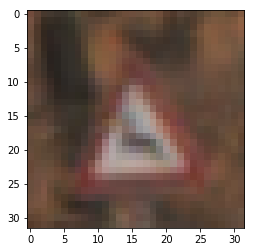

In [11]:
image_sample = X_train[300]
plt.imshow(image_sample)

**2.5 Analysis of labels distribution**

In [12]:
#31 - wild animal crossing
print(y_train[300])

31


In [13]:
values, train_counts = np.unique(y_train, return_counts=True)
values, valid_counts = np.unique(y_valid, return_counts=True)
values, test_counts = np.unique(y_test, return_counts=True)

In [14]:
df_plot = pd.DataFrame(values,index=None, columns=['values'])
df_plot = df_plot.set_index('values')
df_plot['train_counts'] = train_counts
df_plot['valid_counts'] = valid_counts
df_plot['test_counts'] = test_counts
df_plot = df_plot.sort_values(by='train_counts')
df_plot

,train_counts,valid_counts,test_counts
values,,,
0,180,30,60
37,180,30,60
19,180,30,60
32,210,30,60
27,210,30,60
41,210,30,60
42,210,30,90
24,240,30,90
29,240,30,90


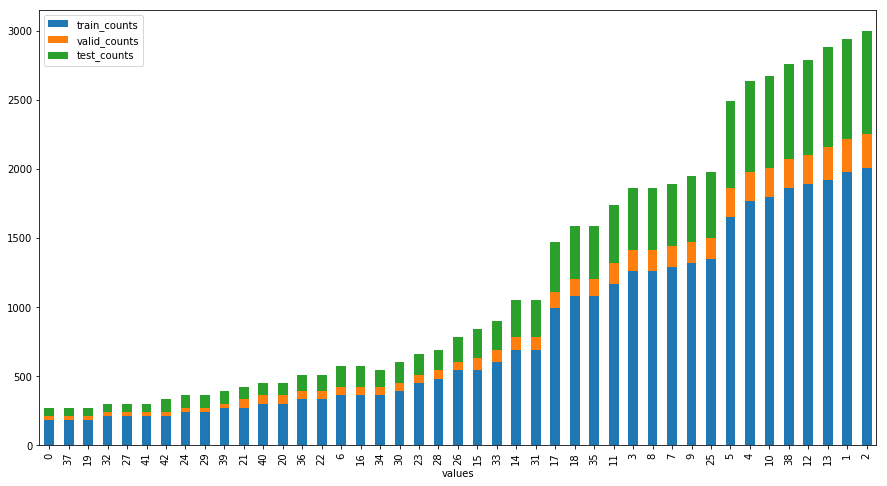

In [15]:
df_plot.plot.bar(stacked=True, figsize=(15, 8))

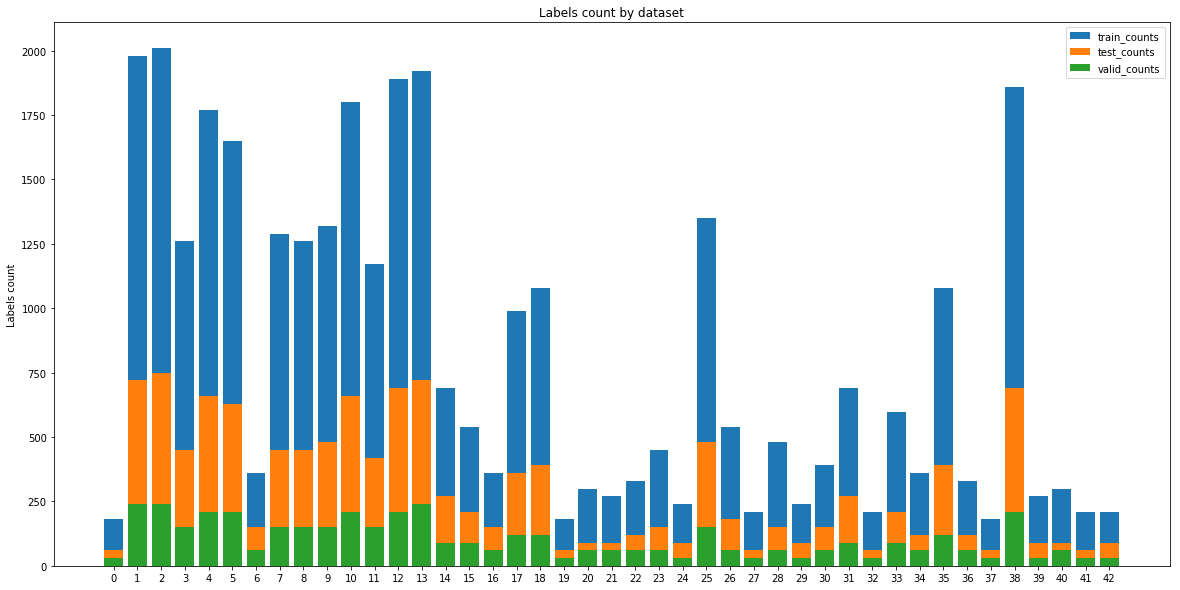

In [16]:
x = np.arange(len(values))
width = 0.8

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x, train_counts, width, label='train_counts')
rects2 = ax.bar(x, test_counts, width, label='test_counts')
rects3 = ax.bar(x, valid_counts, width, label='valid_counts')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Labels count')
ax.set_title('Labels count by dataset')
ax.set_xticks(x)
ax.set_xticklabels(values)
ax.legend()

## 3. Pre-process the Data Set

In [17]:
X_train.shape

(34799, 32, 32, 3)

In [18]:
print(X_train[0].shape)
X_train[0]

(32, 32, 3)


array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ..., 
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ..., 
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ..., 
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ..., 
       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ..., 
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ..., 
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ..., 
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

In [19]:
print(X_train[0][0].shape)
X_train[0][0]

(32, 3)


array([[28, 25, 24],
       [27, 24, 23],
       [27, 24, 22],
       [27, 24, 22],
       [27, 25, 23],
       [29, 27, 25],
       [49, 39, 37],
       [53, 33, 31],
       [49, 28, 28],
       [54, 41, 42],
       [80, 75, 78],
       [92, 91, 96],
       [72, 76, 83],
       [68, 74, 83],
       [81, 87, 94],
       [91, 97, 94],
       [78, 81, 67],
       [65, 65, 58],
       [53, 50, 50],
       [49, 43, 47],
       [59, 49, 52],
       [76, 55, 57],
       [65, 32, 34],
       [63, 32, 35],
       [60, 37, 38],
       [51, 34, 33],
       [41, 29, 24],
       [36, 28, 24],
       [34, 28, 24],
       [32, 28, 24],
       [31, 27, 25],
       [31, 27, 26]], dtype=uint8)

In [20]:
X_train[34798][31][31][2]

80

**3.1 Normalize the data** <br>
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

In [21]:
X_train[0][0][0][0]

28

In [22]:
x = (X_train[0][0][0][0]-128)/128
x

-0.78125

In [23]:
X_train_norm = []

for i in range(0,n_train):
    for j in range(0,32):
        for k in range(0,32):
            for l in range(0,3):
                X_train_norm.append((X_train[i][j][k][l]-128)/128)
            
X_train_norm = np.asarray(X_train_norm)
X_train_norm = X_train_norm.reshape(34799, 32, 32, 3)
print(X_train_norm.shape)
X_train_norm

(34799, 32, 32, 3)


array([[[[-0.78125  , -0.8046875, -0.8125   ],
         [-0.7890625, -0.8125   , -0.8203125],
         [-0.7890625, -0.8125   , -0.828125 ],
         ..., 
         [-0.75     , -0.78125  , -0.8125   ],
         [-0.7578125, -0.7890625, -0.8046875],
         [-0.7578125, -0.7890625, -0.796875 ]],

        [[-0.7734375, -0.796875 , -0.8046875],
         [-0.7890625, -0.8046875, -0.8203125],
         [-0.7890625, -0.8046875, -0.8203125],
         ..., 
         [-0.75     , -0.78125  , -0.8125   ],
         [-0.7578125, -0.7890625, -0.8125   ],
         [-0.765625 , -0.7890625, -0.8046875]],

        [[-0.78125  , -0.796875 , -0.796875 ],
         [-0.7890625, -0.8046875, -0.8203125],
         [-0.796875 , -0.8046875, -0.8203125],
         ..., 
         [-0.75     , -0.78125  , -0.8125   ],
         [-0.7578125, -0.7890625, -0.8125   ],
         [-0.765625 , -0.7890625, -0.8046875]],

        ..., 
        [[-0.7890625, -0.8125   , -0.8203125],
         [-0.78125  , -0.8046875, -0.8125 

In [24]:
print(X_train_norm.min())
print(X_train_norm.max())

-1.0
0.9921875


In [25]:
X_valid_norm = []

for i in range(0,n_validation):
    for j in range(0,32):
        for k in range(0,32):
            for l in range(0,3):
                X_valid_norm.append((X_valid[i][j][k][l]-128)/128)
            
X_valid_norm = np.asarray(X_valid_norm)
X_valid_norm = X_valid_norm.reshape(4410, 32, 32, 3)
print(X_valid_norm.shape)
X_valid_norm

(4410, 32, 32, 3)


array([[[[-0.8984375, -0.90625  , -0.90625  ],
         [-0.90625  , -0.9140625, -0.90625  ],
         [-0.8984375, -0.9140625, -0.9140625],
         ..., 
         [-0.890625 , -0.90625  , -0.9140625],
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.90625  , -0.90625  , -0.9140625]],

        [[-0.8984375, -0.90625  , -0.8984375],
         [-0.90625  , -0.9140625, -0.90625  ],
         [-0.8984375, -0.90625  , -0.90625  ],
         ..., 
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.90625  , -0.90625  , -0.9140625]],

        [[-0.8984375, -0.90625  , -0.8984375],
         [-0.90625  , -0.9140625, -0.90625  ],
         [-0.90625  , -0.90625  , -0.90625  ],
         ..., 
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.90625  , -0.90625  , -0.9140625]],

        ..., 
        [[-0.875    , -0.8828125, -0.8828125],
         [-0.8828125, -0.890625 , -0.89062

In [26]:
print(X_valid_norm.min())
print(X_valid_norm.max())

-1.0
0.9921875


In [27]:
X_test_norm = []

for i in range(0,n_test):
    for j in range(0,32):
        for k in range(0,32):
            for l in range(0,3):
                X_test_norm.append((X_test[i][j][k][l]-128)/128)
            
X_test_norm = np.asarray(X_test_norm)
X_test_norm = X_test_norm.reshape(n_test, 32, 32, 3)
print(X_test_norm.shape)
X_test_norm

(12630, 32, 32, 3)


array([[[[-0.09375  ,  0.0859375,  0.359375 ],
         [-0.09375  ,  0.0703125,  0.3359375],
         [-0.078125 ,  0.078125 ,  0.34375  ],
         ..., 
         [-0.234375 , -0.109375 ,  0.1171875],
         [-0.2421875, -0.0546875,  0.1484375],
         [-0.3359375, -0.1796875,  0.015625 ]],

        [[-0.1015625,  0.109375 ,  0.375    ],
         [-0.1015625,  0.09375  ,  0.359375 ],
         [-0.0859375,  0.1015625,  0.3671875],
         ..., 
         [-0.0703125,  0.1171875,  0.375    ],
         [-0.0625   ,  0.1015625,  0.3515625],
         [-0.0625   ,  0.0859375,  0.3359375]],

        [[-0.0859375,  0.1015625,  0.359375 ],
         [-0.0859375,  0.109375 ,  0.3671875],
         [-0.109375 ,  0.09375  ,  0.34375  ],
         ..., 
         [-0.0625   ,  0.125    ,  0.3984375],
         [-0.046875 ,  0.125    ,  0.3984375],
         [-0.0625   ,  0.1171875,  0.3828125]],

        ..., 
        [[-0.0859375,  0.0703125,  0.3046875],
         [-0.1015625,  0.046875 ,  0.28125

In [28]:
print(X_test_norm.min())
print(X_test_norm.max())

-1.0
0.9921875


**3.2 Shuffle the data** <br>
By shuffling your data, you ensure that each data point creates an "independent" change on the model, without being biased by the same points before them. Suppose data is sorted in a specified order. For example a data set which is sorted base on their class.

In [29]:
from sklearn.utils import shuffle
X_train_norm, y_train = shuffle(X_train_norm, y_train)
X_valid_norm, y_valid = shuffle(X_valid_norm, y_valid)
X_test_norm, y_test = shuffle(X_test_norm, y_test)

## 4. Design and Test a Deep Learning Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

![LeNet Architecture](lenet.png)
Source: Yan LeCun

In [30]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### 4.1 Epochs and Batch Size

- The EPOCH and BATCH_SIZE values affect the training speed and model accuracy
- Epochs are a single forward and backward pass of the whole dataset during TRAINING
- The larger the batch size the faster the model will train, however memory limitations
- Batch_SIZE Is the number of datapoints per batch. Number of batches = number of images / batch_size
- Batch x = images, batch y = Labels

In [31]:
EPOCHS = 50
BATCH_SIZE = 128

### 4.2 Placeholders

- input = tf.float32, [bacth_size, image_height, image_width, color_channels]
- batch size is set to NONE for placeholder variable, which allows later to accept a batch of any size

In [32]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

### 4.3 Model architecture

**4.3.1 Weights and Biases**
- weight = tf.Variable(tf.random_normal([filter_size_height, filter_size_width, color_channels, k_output]))
- biases = tf.Variable(tf.random_normal([k_output]))<br>

**4.3.2 Strides and Padding**
- stride for each dimension (batch_size, height, width, depth)
- For both ksize and strides, the batch_size and channel_depth dimensions are typically set to 1.
- padding is either 'VALID' or 'SAME'. 

**4.3.3 Graph Operations**
- Convolutions
    - tf.nn.conv2d(x, weights, strides=[1, 1, 1, 1], padding='VALID') + biases
    - Activation function: tf.nn.relu(conv2d)
- Maxpooling
    - tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
- Flattening 
    - flatten(conv2d)
- Matrix multiplication
    - fc = fully connected layer
    - tf.add(tf.matmul(fc, weights['weights']), biases['biases']) 
    - Activation function: tf.nn.relu(fc)
    - Optimization/Regularization: tf.nn.dropout(fc, dropout) with dropout being the probability to keep units

**4.3.4 Regularization** <br>
The network thats just the right size for your data is very very hard to optimize. In practive, we always try networks that are way too big for our data and then we try our best to prevent them from overfitting.

**Note that Regularization only applies to the fully-connected region of your convnet.** If you add dropout between conv layers. It'll only degrade the performance further since conv layers are already very sparse. For conv layers instead you can insert batch normalization between your convolutions. This will regularize your model, as well as make your model more stable during training.

**Dropout Regularization** <br>
- The values that go from one layer to the next are called activations
- Randomly, for every example you train your network on, set a set number of the activations to 0, i.e. keep_prob = 0.5 then set half of the activations to 0
- At the same time factor the remaining activations by a factor of 1/keep_prob
- Take the consenus ye by averaging the activations yt
- TensorFlow provides the **tf.nn.dropout()** function, which you can use to implement dropout.

**During training**, a good starting value for keep_prob is 0.5.

**During testing**, use a keep_prob value of 1.0 to keep all units and maximize the power of the model.

**Code**
The tf.nn.dropout() function takes in two parameters:

- hidden_layer: the tensor to which you would like to apply dropout
- keep_prob: the probability of keeping (i.e. not dropping) any given unit
- keep_prob allows you to adjust the number of units to drop. In order to compensate for dropped units, tf.nn.dropout() multiplies all units that are kept (i.e. not dropped) by 1/keep_prob.

**Batch Normalization**
Batch normalization is another method to regularize a convolutional network.
On top of a regularizing effect, batch normalization also gives your convolutional network a resistance to vanishing gradient during training. This can decrease training time and result in better performance.
https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html

In [33]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # mu and sigma define how we initialize our weights, they can be adjusted as additional hyperparameter to improve the model
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.   
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    # Same result using padding = 'SAME' due to aymmetric matrix
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    # Same result using padding = 'SAME' due to aymmetric matrix
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

**Formulas Convolution Parameters**

1. For Valid Padding
    - out_height = ceil(float(in_height - filter_height + 1) / float(strides))
    - out_width  = ceil(float(in_width - filter_width + 1) / float(strides))
2. For Same Padding
    - out_height = ceil(float(in_height / float(strides))
    - out_width  = ceil(float(in_width / float(strides))

*ceil = rounding up*

In [34]:
# SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
Input = [32,32,3]
Output = [28,28,6]
#Formula
#out_height_width = (float(in_height_width - filter_height_width + 1) / float(strides))
#Output[0] = (Input[0] - filter_height_width + 1)/1
filter_height_width = Input[0]-Output[0]+1
    
print(filter_height_width)

5


In [35]:
# SOLUTION: Layer 2: Convolutional. Input = 32x32x1. Output = 28x28x6.
Input = [14,14,6]
Output = [10,10,6]

filter_height_width = Input[0]-Output[0]+1
    
print(filter_height_width)

5


### 4.4 Loss function, Optimizer & Accuracy evaluation

**4.4.1 Cross entropy loss function**

- Cross entropy minimises difference of softmax generated probabilities (logits) to one hot encoded labels
- rf.reduce_mean averages the difference from logits to ground truth labels

In [36]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

**4.4.2 Learning rate**

- For Optimizer (i.e. Gradient Descent, Adam Optimizer) to update weights and bias during training. New weights and bias deduct learning rate * derivative of weights and bias.
- Learning rate defines how quickly the network updates its weights with 0.001 being a good default value 
- Stay calm and decrease your learning rate for better accuracy

In [37]:
rate = 0.001

**4.4.3 Adam Optimizer**

- AdamOptimizer is more sophisticated than stochastic gradient descent and a good default optimizer Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems). The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.
- optimizer.minimze uses back propagation to update the network and minimize the training loss

In [38]:
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

**4.4.4 Accuracy evaluation**

- "tf.equal(tf.argmax(logits, 1)" outputs the correct label, which is the label with the max probability across the logits 
- "tf.argmax(one_hot_y, 1)" outputs the actual true values
- tf.equal compares the two tensors and returns a list of booleans [True, False, True...] for all the predictions 
- Convert (cast) the list of booleans into a list of binary value [0,1,0,..] with accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [39]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 4.5 Train, Validate and Test the Model

**Training:**
- loss_operation = tf.reduce_mean(cross_entropy)
- optimizer = tf.train.AdamOptimizer(learning_rate = rate)
- training_operation = optimizer.minimize(loss_operation)
- sess.run(training_operation, feed_dict={x: X_train, y: y_train})

**Validation:**
- correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
- accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
- accuracy = sess.run(accuracy_operation, feed_dict={x: X_validation, y: y_validation})

**Testing:**
- Same as Validation (6.2) with the only difference feeding testing dataset into the session
- correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
- accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
- accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test})

**Conclusion:** Hence validation and testing runs the same code (def evaluate accuracy operation) just on different datasets, wereby training runs training_operation on training dataset, there is no accuracy in training, only training itself

In [40]:
#keep prob required to implement dropout regularization

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


**4.5.1 Train the model**

**Initialize values & Run session**

Initializing weights and biases using tf.truncan, tf.random or tf.zeros

- tf.zeros is only for simplicity as it doesnt provide any randomness and is hence not a great choice 
- tf.random: tf. truncated_normal() selects random numbers from a normal distribution whose mean is close to 0 and values are close to 0. For example, from -0.1 to 0.1
- tf.truncated: the generated values follow a normal distribution with specified mean and standard deviation, except that values whose magnitude is more than 2 standard deviations from the mean are dropped and re-picked. It's called truncated because your cutting off the tails from a normal distribution

In [41]:
saver = tf.train.Saver()

In [42]:
# training operation feeds in its training data 
# after the training validation accuracy is calculated based on validation data 
# keep prob required to implement dropout regularization

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)    
        for offset in range(0, n_train, BATCH_SIZE):
            batch_x, batch_y = X_train_norm[offset:offset + BATCH_SIZE], y_train[offset:offset + BATCH_SIZE]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy = evaluate(X_train_norm, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        #print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.591

Validation Accuracy = 0.529

EPOCH 2 ...
Training Accuracy = 0.855

Validation Accuracy = 0.798

EPOCH 3 ...
Training Accuracy = 0.921

Validation Accuracy = 0.868

EPOCH 4 ...
Training Accuracy = 0.933

Validation Accuracy = 0.875

EPOCH 5 ...
Training Accuracy = 0.964

Validation Accuracy = 0.915

EPOCH 6 ...
Training Accuracy = 0.972

Validation Accuracy = 0.919

EPOCH 7 ...
Training Accuracy = 0.970

Validation Accuracy = 0.913

EPOCH 8 ...
Training Accuracy = 0.977

Validation Accuracy = 0.935

EPOCH 9 ...
Training Accuracy = 0.985

Validation Accuracy = 0.939

EPOCH 10 ...
Training Accuracy = 0.985

Validation Accuracy = 0.938

EPOCH 11 ...
Training Accuracy = 0.989

Validation Accuracy = 0.945

EPOCH 12 ...
Training Accuracy = 0.987

Validation Accuracy = 0.937

EPOCH 13 ...
Training Accuracy = 0.990

Validation Accuracy = 0.945

EPOCH 14 ...
Training Accuracy = 0.991

Validation Accuracy = 0.945

EPOCH 15 ...
Training Accuracy

### 4.6 Interpretation of accuracy results in training and validation

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

**Conclusion**: Hence the model seems to be slightly overfitting as validation accuracy is always lower than training accuracy. To avoid overfitting images can as an example be converted to grayscale images. 

### 4.7 Final Model Evaluation on Test dataset

Once you are completely satisfied with your model, evaluate the performance of the model on the test set. 

Be sure to only do this once!<br>
If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [43]:
#test_accuracy feeds in its own testing data for Testing

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.949


## 5. Test the model on new images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import tensorflow as tf

**5.1 Load and Output the New Images**

In [45]:
Trafficsign1 = mpimg.imread('Trafficsign1.jpg')
Trafficsign2 = mpimg.imread('Trafficsign2.jpg')
Trafficsign3 = mpimg.imread('Trafficsign3.jpg')
Trafficsign4 = mpimg.imread('Trafficsign4.jpg')
Trafficsign5 = mpimg.imread('Trafficsign5.jpg')

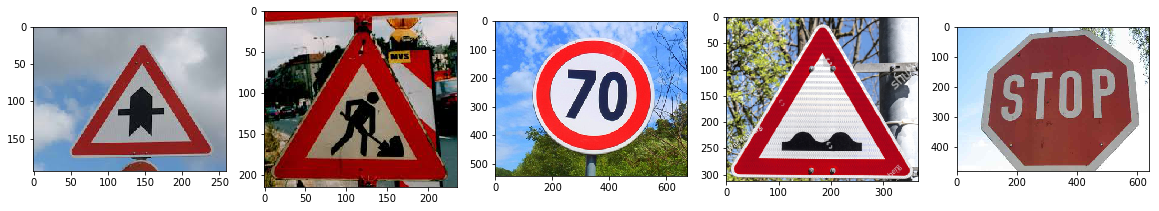

In [46]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,10))
ax1.imshow(Trafficsign1)
ax2.imshow(Trafficsign2)
ax3.imshow(Trafficsign3)
ax4.imshow(Trafficsign4)
ax5.imshow(Trafficsign5)

array([[[152, 160, 173],
        [157, 165, 178],
        [154, 166, 180],
        ..., 
        [171, 173, 188],
        [164, 166, 181],
        [160, 162, 177]],

       [[153, 164, 176],
        [156, 167, 179],
        [156, 168, 182],
        ..., 
        [165, 172, 182],
        [163, 170, 180],
        [156, 163, 173]],

       [[151, 165, 176],
        [152, 166, 177],
        [154, 166, 180],
        ..., 
        [162, 171, 178],
        [159, 168, 175],
        [155, 164, 171]],

       ..., 
       [[106, 155, 204],
        [103, 157, 201],
        [102, 154, 204],
        ..., 
        [119, 147, 176],
        [124, 145, 174],
        [123, 144, 173]],

       [[129, 166, 204],
        [133, 173, 216],
        [105, 157, 207],
        ..., 
        [114, 144, 179],
        [111, 142, 178],
        [112, 143, 180]],

       [[155, 182, 210],
        [145, 174, 215],
        [107, 159, 209],
        ..., 
        [114, 148, 186],
        [105, 144, 186],
        [104, 143,

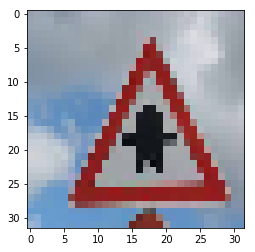

In [47]:
Trafficsign1 = cv2.resize(Trafficsign1, (32,32))
plt.imshow(Trafficsign1)
Trafficsign1

**5.2 Preprocess new images**

**5.2.1 Resize images to 32x32 pixels**

In [48]:
Trafficsign2 = cv2.resize(Trafficsign2, (32,32))
Trafficsign3 = cv2.resize(Trafficsign3, (32,32))
Trafficsign4 = cv2.resize(Trafficsign4, (32,32))
Trafficsign5 = cv2.resize(Trafficsign5, (32,32))

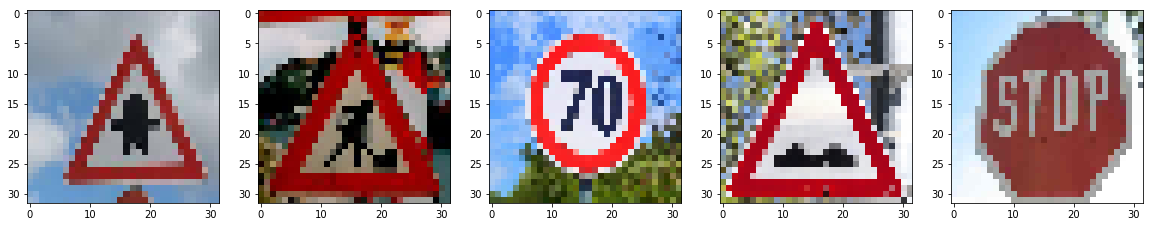

In [49]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,10))
ax1.imshow(Trafficsign1)
ax2.imshow(Trafficsign2)
ax3.imshow(Trafficsign3)
ax4.imshow(Trafficsign4)
ax5.imshow(Trafficsign5)

**5.2.2 Create a list of 32x32 normalised new images**

In [50]:
new_images = []
new_images.append(Trafficsign1)
new_images.append(Trafficsign2)
new_images.append(Trafficsign3)
new_images.append(Trafficsign4)
new_images.append(Trafficsign5)
new_images

[array([[[152, 160, 173],
         [157, 165, 178],
         [154, 166, 180],
         ..., 
         [171, 173, 188],
         [164, 166, 181],
         [160, 162, 177]],
 
        [[153, 164, 176],
         [156, 167, 179],
         [156, 168, 182],
         ..., 
         [165, 172, 182],
         [163, 170, 180],
         [156, 163, 173]],
 
        [[151, 165, 176],
         [152, 166, 177],
         [154, 166, 180],
         ..., 
         [162, 171, 178],
         [159, 168, 175],
         [155, 164, 171]],
 
        ..., 
        [[106, 155, 204],
         [103, 157, 201],
         [102, 154, 204],
         ..., 
         [119, 147, 176],
         [124, 145, 174],
         [123, 144, 173]],
 
        [[129, 166, 204],
         [133, 173, 216],
         [105, 157, 207],
         ..., 
         [114, 144, 179],
         [111, 142, 178],
         [112, 143, 180]],
 
        [[155, 182, 210],
         [145, 174, 215],
         [107, 159, 209],
         ..., 
         [114, 148, 186

**5.2.3 Normalise pixel values of new images**

In [193]:
X_new_norm = []

for i in range(0,5):
    for j in range(0,32):
        for k in range(0,32):
            for l in range(0,3):
                X_new_norm.append((new_images[i][j][k][l]-128)/128)
            
X_new_norm  = np.asarray(X_new_norm)
X_new_norm = np.float32(X_new_norm)
X_new_norm  = X_new_norm.reshape(5, 32, 32, 3)
print(X_new_norm.shape)
print(X_new_norm.dtype)
X_new_norm

(5, 32, 32, 3)
float32


array([[[[ 0.1875   ,  0.25     ,  0.3515625],
         [ 0.2265625,  0.2890625,  0.390625 ],
         [ 0.203125 ,  0.296875 ,  0.40625  ],
         ..., 
         [ 0.3359375,  0.3515625,  0.46875  ],
         [ 0.28125  ,  0.296875 ,  0.4140625],
         [ 0.25     ,  0.265625 ,  0.3828125]],

        [[ 0.1953125,  0.28125  ,  0.375    ],
         [ 0.21875  ,  0.3046875,  0.3984375],
         [ 0.21875  ,  0.3125   ,  0.421875 ],
         ..., 
         [ 0.2890625,  0.34375  ,  0.421875 ],
         [ 0.2734375,  0.328125 ,  0.40625  ],
         [ 0.21875  ,  0.2734375,  0.3515625]],

        [[ 0.1796875,  0.2890625,  0.375    ],
         [ 0.1875   ,  0.296875 ,  0.3828125],
         [ 0.203125 ,  0.296875 ,  0.40625  ],
         ..., 
         [ 0.265625 ,  0.3359375,  0.390625 ],
         [ 0.2421875,  0.3125   ,  0.3671875],
         [ 0.2109375,  0.28125  ,  0.3359375]],

        ..., 
        [[-0.171875 ,  0.2109375,  0.59375  ],
         [-0.1953125,  0.2265625,  0.57031

In [179]:
print(X_new_norm.min())
print(X_new_norm.max())

-1.0
0.9921875


**5.3 Create a list of corresponding traffic sign names**

In [181]:
y_new = [11,25,4,22,14]
y_new = np.array(y_new, dtype=np.uint8)
y_new

array([11, 25,  4, 22, 14], dtype=uint8)

**5.4 Run prediction on covnet**

**5.4.1 Calculate accuracy operation**

In [183]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = evaluate(X_new_norm, y_new)
    print("New Images Accuracy = {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
New Images Accuracy = 0.600


**5.4.2 Print Cross_entropy values of images**

In [200]:
with tf.Session() as sess:
    
    cross_entropy_new = sess.run(cross_entropy)

print(cross_entropy_new)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,32,32,3]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,32,32,3], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Reshape_2/_5 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_164_Reshape_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-163326968cc6>", line 1, in <module>
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,32,32,3]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,32,32,3], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Reshape_2/_5 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_164_Reshape_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


**5.4.3 Print correct prediction with new evaluate function**

In [204]:
def evaluate_new(X_data, y_data):
    num_examples = len(X_data)
    total_prediction = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        prediction = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y})
        total_prediction += (prediction * len(batch_x))
    return total_prediction / num_examples

In [205]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = evaluate_new(X_new_norm, y_new)
    print(prediction)

INFO:tensorflow:Restoring parameters from ./lenet


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Equal/_73 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_124_Equal", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-163326968cc6>", line 4, in <module>
    keep_prob = tf.placeholder(tf.float32)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Equal/_73 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_124_Equal", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


**5.4.4 Print logits with new evaluate function**

In [171]:
def evaluate_new(X_data, y_data):
    
    sess = tf.get_default_session()
    
    for i in range(0, 4):
        logits_new_images = sess.run(logits_new, feed_dict={x: X_new_norm[i]})
        #accuracy = sess.run(accuracy_operation_new, feed_dict={x: X_data[i], y: y_data[i]})
        #total_accuracy += accuracy
        
    #return total_accuracy / 5
    return logits_new_images

In [141]:
def evaluate_new_2(X_data):
    
    sess = tf.get_default_session()
    logits_new_images = sess.run(logits_new, feed_dict={x: X_data})
        
    return logits_new_images

In [142]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logits_new_images = evaluate_new_2(X_new_norm)
    #accuracy = sess.run(accuracy_operation, feed_dict={x: X_new_norm, y: y_new})
    print(logits_new_images)

INFO:tensorflow:Restoring parameters from ./lenet


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: add_69/_69 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_108_add_69", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-163326968cc6>", line 4, in <module>
    keep_prob = tf.placeholder(tf.float32)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: add_69/_69 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_108_add_69", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")